In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


### Load The Data :

In [30]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [31]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [32]:
df.shape

(558837, 16)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


### Observation :
1. The dataset has 58837 rows and 16 columns
2. The calumns in the dataset are: 'year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate'.
3. We have 5 numerical and 11 Object types in our dataset.

### Descriptive statistics :

In [34]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Missing Data :

In [35]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_count

transmission    65352
body            13195
condition       11820
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
mmr                38
sellingprice       12
saledate           12
vin                 4
year                0
state               0
seller              0
dtype: int64

### Exploratory Data Analysis 

Text(0.5, 1.0, 'missing null values')

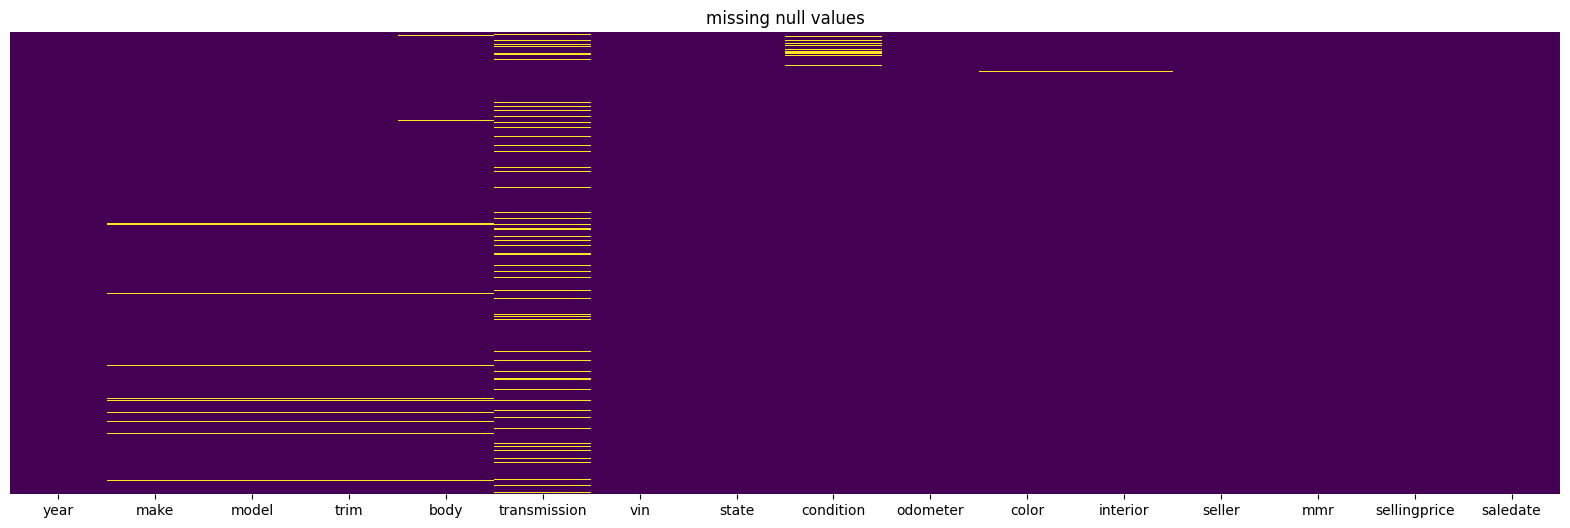

In [36]:
mpl.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("missing null values")


Text(0.5, 1.0, 'Missig percentage of null values')

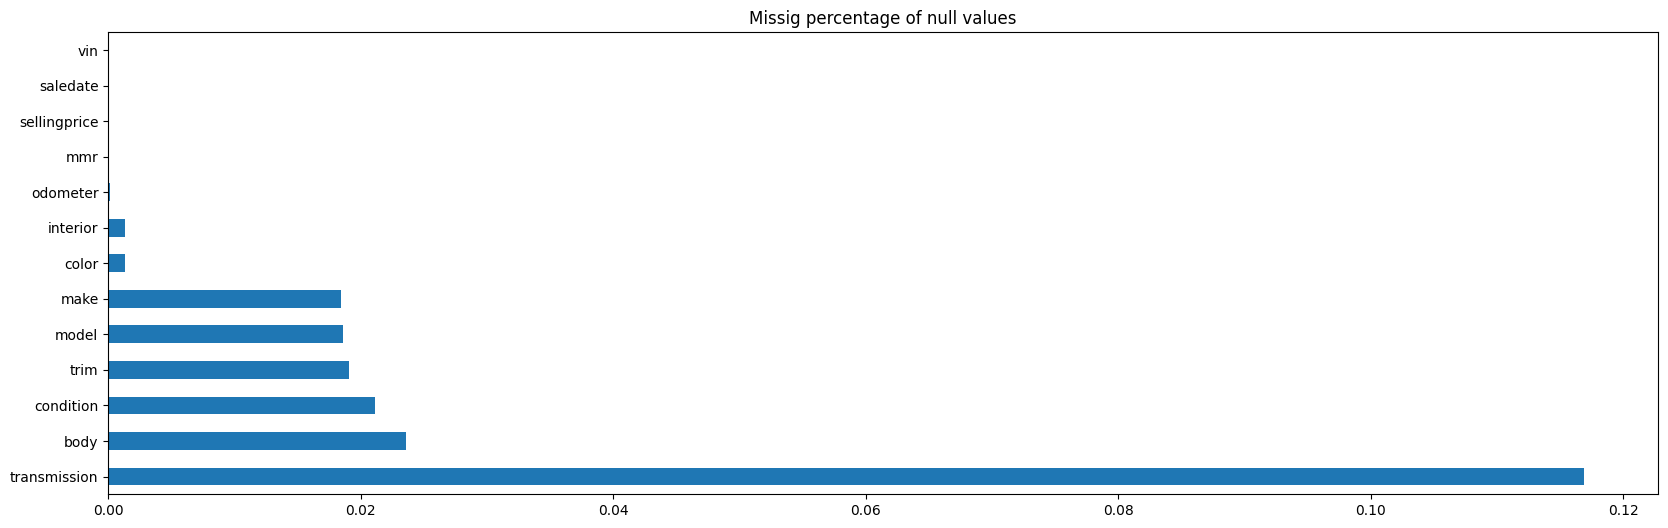

In [37]:
missing_percentage = missing_count/len(df)
missing_percentage = missing_percentage[missing_percentage != 0] 
mpl.rcParams['figure.figsize'] = (20,6)
missing_percentage.plot(kind = 'barh')
plt.title("Missig percentage of null values")

### Observation :
Dealing with null values
1. Columns with highest percentage of null values:
    * Transmission



In [38]:
df['transmission'].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [39]:
# Sort the DataFrame by 'make', 'model', 'trim', and 'body'
df.sort_values(by=['make', 'model', 'trim', 'body'], inplace=True)

# Use forward fill to fill missing transmission values
df['transmission'] = df['transmission'].ffill()

In [40]:
df.dropna(axis=0, inplace=True)

In [41]:
df.isnull().sum().sort_values(ascending=False)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [42]:
df['year'].unique()

array([1997, 1999, 1998, 2001, 2003, 2002, 2014, 2013, 2015, 2000, 1994,
       1996, 1995, 1993, 2012, 2011, 2009, 2008, 2007, 2005, 2006, 2010,
       2004, 1992, 1991, 1990], dtype=int64)

In [43]:
df['make'].unique()

array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'], dtype=object)

In [44]:
df['body'] = df['body'].str.lower()

In [45]:
df['body'].unique()

array(['coupe', 'sedan', 'hatchback', 'suv', 'tsx sport wagon',
       'convertible', 'wagon', 'minivan', 'cts coupe', 'cts wagon',
       'cts-v coupe', 'cts-v wagon', 'crew cab', 'regular cab',
       'extended cab', 'van', 'double cab', 'club cab', 'quad cab',
       'mega cab', 'ram van', 'e-series van', 'supercrew', 'supercab',
       'regular-cab', 'transit van', 'elantra coupe', 'genesis coupe',
       'g convertible', 'g coupe', 'g sedan', 'g37 convertible',
       'g37 coupe', 'q60 convertible', 'q60 coupe', 'koup',
       'granturismo convertible', 'cab plus 4', 'cab plus', 'king cab',
       'promaster cargo van', 'access cab', 'xtracab', 'crewmax cab',
       'beetle convertible'], dtype=object)

In [46]:
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [47]:
df['color'].unique()

array(['green', 'blue', 'red', 'black', 'white', 'beige', 'silver',
       'gray', 'gold', 'orange', 'burgundy', 'off-white', '—', 'purple',
       'turquoise', 'charcoal', 'brown', 'yellow', 'pink', 'lime'],
      dtype=object)

In [48]:
df['interior'].unique()

array(['gray', 'black', 'beige', 'tan', '—', 'brown', 'silver', 'green',
       'orange', 'blue', 'gold', 'yellow', 'white', 'purple', 'red',
       'burgundy', 'off-white'], dtype=object)

In [49]:
df['color'].replace('—', 'multicolor', inplace=True)
df['interior'].replace('—', 'multicolor', inplace=True)

In [50]:
df['sale_date'] = pd.to_datetime(df['saledate'], utc=True, format='mixed').dt.date


In [51]:
df['sale_time'] = pd.to_datetime(df['saledate'], utc=True, format='mixed').dt.time


In [52]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_date,sale_time
29761,1997,Acura,CL,2.2,coupe,automatic,19uya1247vl006813,va,2.0,123999.0,green,gray,purple heart,1175.0,325.0,Thu Dec 18 2014 11:50:00 GMT-0800 (PST),2014-12-18,03:50:00
234464,1997,Acura,CL,2.2,coupe,automatic,19uya1249vl015397,nc,19.0,175551.0,blue,gray,dt credit corporation,875.0,1400.0,Tue Feb 03 2015 01:30:00 GMT-0800 (PST),2015-02-02,17:30:00
131389,1997,Acura,CL,2.2 Premium,coupe,manual,19uya1150vl018229,ca,2.0,375363.0,red,black,onemain rem/alliance motor cars,475.0,400.0,Wed Jan 14 2015 03:00:00 GMT-0800 (PST),2015-01-13,19:00:00
164065,1997,Acura,CL,2.2 Premium,coupe,manual,19uya1152vl011623,md,2.0,234679.0,green,gray,purple heart services inc,700.0,350.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST),2015-01-19,20:00:00
234437,1997,Acura,CL,2.2 Premium,coupe,automatic,19uya1259vl008474,pa,3.0,174137.0,blue,black,purple heart,950.0,550.0,Tue Feb 03 2015 05:01:00 GMT-0800 (PST),2015-02-02,21:01:00


### Visualization

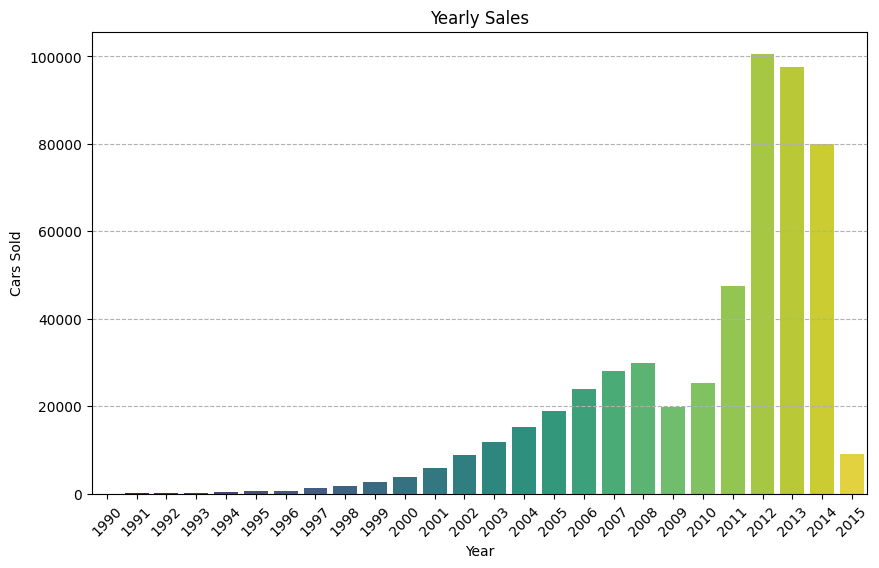

In [94]:
year_counts = df['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='year', data=df, palette='viridis', legend=False)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Cars Sold')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--')
plt.show()

In [128]:
# Step 1: Calculate value counts and sort them
Brand_sold = df['make'].value_counts().sort_values(ascending=False).head(20).reset_index()
Brand_sold.columns = ['Make', 'Count']


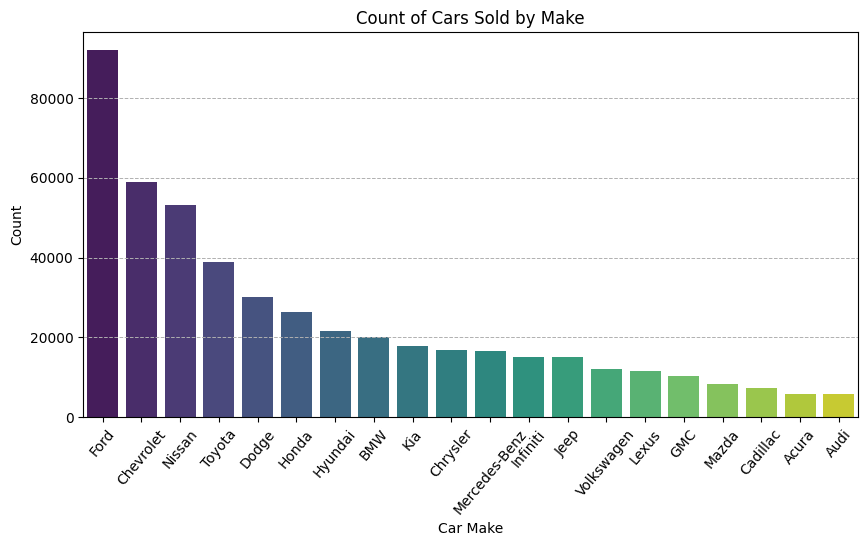

In [136]:
# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=Brand_sold,legend=False, hue='Make',x='Make', y='Count', palette='viridis')
plt.title('Count of Cars Sold by Make')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=50)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [141]:
# Step 1: Calculate value counts and sort them
Body_sold = df['body'].value_counts().sort_values(ascending=False).head(10).reset_index()
Body_sold.columns = ['Body', 'Count']

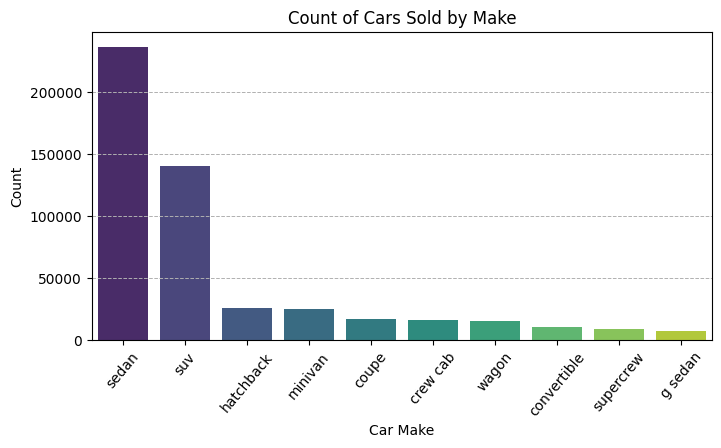

In [143]:
# Step 3: Plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=Body_sold,legend=False, hue='Body',x='Body', y='Count', palette='viridis')
plt.title('Count of Cars Sold by Make')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=50)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

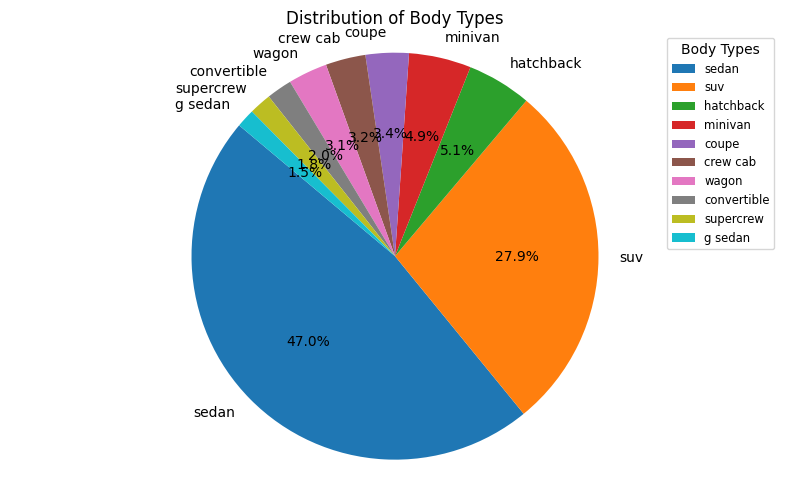

In [162]:
body_type_counts = df['body'].value_counts().head(10)

# Create pie chart
plt.figure(figsize=(8, 5))
plt.pie(body_type_counts, labels=body_type_counts.index, autopct='%1.1f%%', startangle=140 )
plt.title('Top 10 of Body Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title="Body Types", loc="best", fontsize='small')

# Ensure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()